In [1]:
require(dplyr)
require(tidyr)
#library(tidyverse)
library(DESeq2)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    d

In [2]:
samples<-read.csv(file="samplelist.csv")

In [3]:
samples

X,orig.ident,nCount_RNA,nFeature_RNA,label,RNA_snn_res.1,seurat_clusters
<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>
X1Ca.csv,normal,28399,6186,cancer,0,0
X1N.csv,normal,19946,4939,normal,1,1
X2533460Ca.csv,normal,8862,3143,cancer,0,0
X2533460N.csv,normal,17536,4837,normal,1,1
X2534465Ca.csv,normal,3836,1370,cancer,0,0
X2534465N.csv,normal,3469,1293,normal,1,1
X2537821Ca.csv,normal,11371,3787,cancer,0,0
X2537821N.csv,normal,18240,5088,normal,1,1
X3Ca.csv,normal,17625,4501,cancer,0,0


In [4]:
filenames4<-samples$X

In [5]:
filenames4<-gsub('X','',filenames4)

In [6]:
length(filenames4)

[1] 30

In [7]:
temp<-read.csv(filenames4[1],header=T)
temp
temp2<-temp[,c(1,8)]

X,circfind,CIRI,findcirc,circexp,sum,count,result
<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
chr1_100011364_100017815_+,0,2,1,0,2,3,1.50
chr1_100049908_100061949_+,1,0,0,1,2,2,1.00
chr1_100049908_100069685_+,3,0,3,3,3,9,3.00
chr1_100059877_100068586_+,1,0,1,1,3,3,1.00
chr1_100136881_100140514_+,2,0,0,2,2,4,2.00
chr1_100436132_100462881_+,1,0,1,0,2,2,1.00
chr1_100494817_100499262_+,1,0,1,1,3,3,1.00
chr1_100906851_100921841_+,3,5,2,3,4,13,3.25
chr1_100906851_100965918_+,1,0,1,0,2,2,1.00


In [8]:
#count of single circRNA max: 1000

In [9]:
temp2$result<-round(temp2$result)
temp2<-temp2[which(temp2$result<1000),]
colnames(temp2)<-c("circRNA",filenames4[1])
data4 <- temp2

In [10]:
for (i in 2:30){
  temp<-read.csv(filenames4[i],header=T)
  temp
  temp2<-temp[,c(1,8)]
  temp2$result<-round(temp2$result)
  temp2<-temp2[which(temp2$result<1000),]
  colnames(temp2)<-c("circRNA",filenames4[i])
  data4 <- merge(data4,temp2,all=T)
}

In [11]:
data4[is.na(data4)]<-0
data4

circRNA,1Ca.csv,1N.csv,2533460Ca.csv,2533460N.csv,2534465Ca.csv,2534465N.csv,2537821Ca.csv,2537821N.csv,3Ca.csv,⋯,clean43540519Ca.csv,clean43540519N.csv,N6.csv,N7.csv,P4.csv,P5.csv,T4.csv,T5.csv,T6.csv,T7.csv
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_100007033_100017815_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
chr1_100007033_100043229_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
chr1_100007033_100050004_+,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100011364_100017815_+,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
chr1_100015301_100017815_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100024108_100024325_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100043072_100050004_+,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100043072_100061949_+,0,0,0,2,0,0,0,0,0,⋯,0,0,3,0,0,0,0,0,0,1
chr1_100043072_100068586_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


In [12]:
rownames(data4)<-data4$circRNA
data4$circRNA<-NULL
data4$X<-NULL

In [13]:
temp0<-read.csv(filenames4[1],header=T)
dim(temp0)
temp0$result<-round(temp0$result)
temp0<-temp0[which(temp0$result<1000),]
dim(temp0)
temp0<-temp0[,c(2,3,4,5)]
see<-rowSums(as.matrix(temp0)>0)
count<-as.data.frame(table(see))

[1] 10165     8

[1] 10163     8

In [14]:
colnames(count)<-c("algorithms","freq")
count$freq<-count$freq/sum(count$freq)
count$label<-filenames4[1]
count

algorithms,freq,label
<fct>,<dbl>,<chr>
2,0.3848273,1Ca.csv
3,0.3628850,1Ca.csv
4,0.2522877,1Ca.csv


In [15]:
for (i in 2:30){
temp<-read.csv(filenames4[i],header=T)
temp$result<-round(temp$result)
temp<-temp[which(temp$result<1000),]
temp<-temp[,c(2,3,4,5)]
see<-rowSums(as.matrix(temp)>0)
see<-as.data.frame(table(see))
colnames(see)<-c("algorithms","freq")
see$freq<-see$freq/sum(see$freq)
see$label<-filenames4[i]
count<-rbind(count,see)
}

In [16]:
count

algorithms,freq,label
<fct>,<dbl>,<chr>
2,0.3848273,1Ca.csv
3,0.3628850,1Ca.csv
4,0.2522877,1Ca.csv
2,0.3788453,1N.csv
3,0.3702767,1N.csv
4,0.2508779,1N.csv
2,0.4151104,2533460Ca.csv
3,0.3830645,2533460Ca.csv
4,0.2018251,2533460Ca.csv


In [17]:
newlab<-filenames4[c(27,28,29,30,1,3,5,7,9,11,13,15,17,19,21,2,4,6,8,10,12,14,16,18,20,22,26,25,24,23)]
length(newlab)                     

[1] 30

In [18]:
options(repr.plot.height=5,repr.plot.width=5)

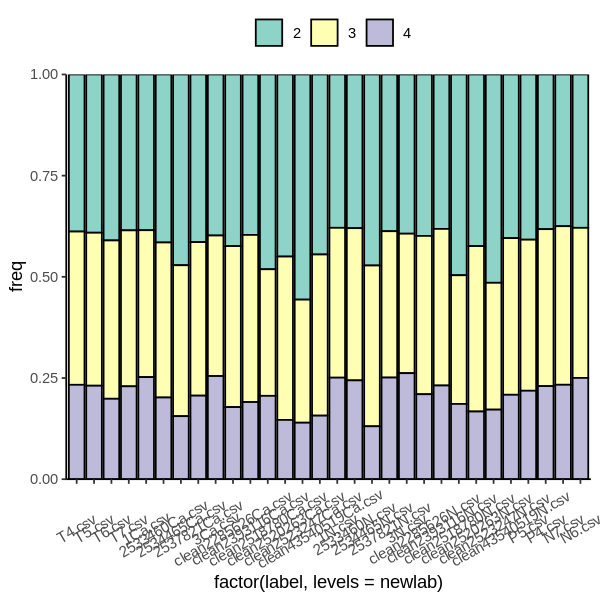

In [19]:
library(ggplot2)
ggplot(count, aes(x=factor(label,levels=newlab),y=freq,fill=algorithms)) +
  geom_bar(stat="identity",color="black") +
  scale_y_continuous(expand=c(0,0))+
 scale_fill_brewer(palette = "Set3")+
  theme_classic()+
theme(legend.position = "top",axis.text.x = element_text(angle = 30, hjust = 0.5, vjust = 0.5))+
 guides(fill=guide_legend(title=NULL))
ggsave("0714-algorithmcapture3.pdf",width=7,height=7)

In [20]:
know2<-t(data4)
know2

,chr1_100007033_100017815_+,chr1_100007033_100043229_+,chr1_100007033_100050004_+,chr1_100011364_100017815_+,chr1_100015301_100017815_+,chr1_100024108_100024325_+,chr1_100043072_100050004_+,chr1_100043072_100061949_+,chr1_100043072_100068586_+,chr1_100043072_100078548_+,⋯,chrY_57075977_57087107_+,chrY_57082142_57087107_+,chrY_57082142_57106400_+,chrY_6915591_6917743_+,chrY_6995803_7043125_+,chrY_7312491_7326169_+,chrY_7341114_7371889_+,chrY_8068906_8070117_-,chrY_8068906_8077174_-,chrY_8068906_8087726_-
1Ca.csv,0,0,0,2,0,0,0,0,0,0,⋯,0,0,0,1,0,3,10,2,0,1
1N.csv,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
2533460Ca.csv,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,2,0,2,0
2533460N.csv,0,0,0,0,0,0,1,2,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2534465Ca.csv,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2534465N.csv,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2537821Ca.csv,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2537821N.csv,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3Ca.csv,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3N.csv,2,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [21]:
know2<-as.data.frame(know2)

In [22]:
know2$type<-c(rep(c('cancer','normal'),times=11),"normal","normal",'normal','normal','cancer','cancer','cancer','cancer')

In [23]:
cleancan<-know2[which(know2$type=="cancer"),]
cleannor<-know2[which(know2$type=="normal"),]

In [24]:
cleannor$type<-NULL
cleancan$type<-NULL

In [25]:
dim(cleancan)
dim(cleannor)

[1]    15 63758

[1]    15 63758

In [26]:
cleannor<-cleannor[which(rowSums(cleannor)>0),]
cleannor<-cleannor[,which(colSums(cleannor)>0)]

In [27]:
cleancan<-cleancan[which(rowSums(cleancan)>0),]
cleancan<-cleancan[,which(colSums(cleancan)>0)]

In [28]:
dim(cleancan)
dim(cleannor)

[1]    15 41315

[1]    15 39648

In [29]:
library(VennDiagram)
input<-list(colnames(cleancan),colnames(cleannor))
Table<-calculate.overlap(input)
pdf("0714-venncirc.pdf",width=6,height=6)
venn<-venn.diagram(input,NULL, main.cex = 3,
category = c("circRNA_cancer","circRNA_normal"),fill = c("tomato","turquoise"),
cat.col= c("tomato","turquoise"),   imagetype = "tiff",  main.fontfamily="serif") #, filename = "Vennup.tif"
grid.draw(venn)
dev.off()

Loading required package: grid

Loading required package: futile.logger



png 
  2

In [30]:
cleancan<-as.data.frame(table(colSums(as.matrix(cleancan)>0)))
cleannor<-as.data.frame(table(colSums(as.matrix(cleannor)>0)))

In [31]:
cleancan
cleannor

Var1,Freq
<fct>,<int>
1,27669
2,5902
3,2571
4,1453
5,911
6,652
7,470
8,391
9,328


Var1,Freq
<fct>,<int>
1,25209
2,5718
3,2745
4,1513
5,1032
6,722
7,548
8,407
9,366


In [32]:
cleancan$tag<-"cancer"
cleannor$tag<-"normal"

In [33]:
cleancannor<-rbind(cleancan,cleannor)

In [34]:
cleancannor$logFreq<-log10(cleancannor$Freq)
cleancannor

Var1,Freq,tag,logFreq
<fct>,<int>,<chr>,<dbl>
1,27669,cancer,4.441993
2,5902,cancer,3.770999
3,2571,cancer,3.410102
4,1453,cancer,3.162266
5,911,cancer,2.959518
6,652,cancer,2.814248
7,470,cancer,2.672098
8,391,cancer,2.592177
9,328,cancer,2.515874


In [35]:
cleancan<-know2[which(know2$type=="cancer"),]
cleannor<-know2[which(know2$type=="normal"),]

In [36]:
cleannor$type<-NULL
cleancan$type<-NULL

In [37]:
dim(cleancan)
dim(cleannor)

[1]    15 63758

[1]    15 63758

[1]    15 63758

[1]    15 63758

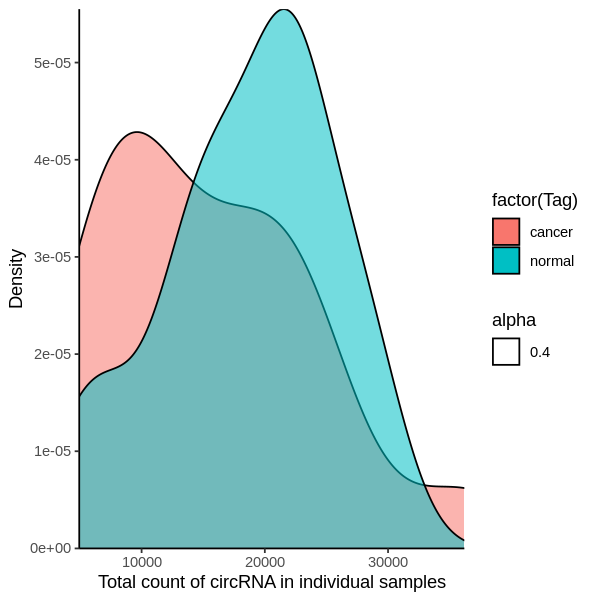

In [38]:
densitycan<-as.data.frame(rowSums(cleancan))
densitynor<-as.data.frame(rowSums(cleannor))
densitycan$tag<-"cancer"
densitynor$tag<-"normal"
dim(cleancan)
dim(cleannor)
colnames(densitycan)<-c("Totalcount","Tag")
colnames(densitynor)<-c("Totalcount","Tag")
density<-rbind(densitycan,densitynor)
ggplot(data=density,aes(x=Totalcount,fill=factor(Tag),alpha=0.4))+
geom_density(stat="density")+
scale_x_continuous(name="Total count of circRNA in individual samples",expand=c(0,0))+
scale_y_continuous(name="Density",expand=c(0,0))+
theme_classic()
ggsave("0714-circdensity.pdf",width=6,height=5)

In [39]:
dim(data4)

[1] 63758    30

In [40]:
circlist<-rownames(data4)

In [41]:
write.table(circlist,file="0714_data4_circlist.txt",quote=FALSE,row.names=FALSE)

In [43]:
circanno<-read.table(file="0714_data4_circlist_out.bed")
dim(circanno)

[1] 93530    10

In [44]:
circanno

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr1,100007033,100017815,+,chr1,99969789,100026979,ENSG00000117620.11,ENSG00000117620.11,+
chr1,100007033,100043229,+,chr1,100030566,100035637,ENSG00000261254.2,ENSG00000261254.2,+
chr1,100007033,100043229,+,chr1,100038097,100083377,ENSG00000156875.12,ENSG00000156875.12,+
chr1,100007033,100043229,+,chr1,99969789,100026979,ENSG00000117620.11,ENSG00000117620.11,+
chr1,100007033,100050004,+,chr1,100030566,100035637,ENSG00000261254.2,ENSG00000261254.2,+
chr1,100007033,100050004,+,chr1,100038097,100083377,ENSG00000156875.12,ENSG00000156875.12,+
chr1,100007033,100050004,+,chr1,99969789,100026979,ENSG00000117620.11,ENSG00000117620.11,+
chr1,100011364,100017815,+,chr1,99969789,100026979,ENSG00000117620.11,ENSG00000117620.11,+
chr1,100015301,100017815,+,chr1,99969789,100026979,ENSG00000117620.11,ENSG00000117620.11,+


In [45]:
table(circanno$V8==circanno$V9)


 TRUE 
93530 

In [46]:
circanno2<-circanno
circanno2<-circanno2[,c(1,2,3,4,8,10)]

In [47]:
circanno2$circRNA<-paste(circanno2$V1,circanno2$V2,circanno2$V3,circanno2$V4,sep="_")

In [48]:
circanno2$strand<-paste(circanno2$V4,circanno2$V10,sep="_")

In [49]:
circanno2<-circanno2[,c(7,5,8)]

In [50]:
load(file = "./htseq/gtf_df.Rda")
require(dplyr)
require(tidyr)

In [51]:
expr_df_nopoint <- circanno2 %>% 
 tidyr::separate(V8,into = c("gene_id","drop"),sep="\\.") %>% 
   dplyr::select(-drop)

expr_df<- gtf_df %>% 
  dplyr::filter(type=="gene",gene_biotype=="protein_coding") %>% #筛选gene,和编码指标
  dplyr::select(c(gene_name,gene_id,gene_biotype)) %>% 
  dplyr::inner_join(expr_df_nopoint ,by ="gene_id") %>% 
  dplyr::select(-c(gene_id,gene_biotype))

In [52]:
expr_df
length(unique(expr_df$circRNA))

gene_name,circRNA,strand
<chr>,<chr>,<chr>
SAMD11,chr1_935771_939412_+,+_+
NOC2L,chr1_955922_957273_-,-_-
AGRN,chr1_1035276_1041702_+,+_+
AGRN,chr1_1043238_1051815_+,+_+
AGRN,chr1_1047326_1050837_+,+_+
SDF4,chr1_1217376_1217686_-,-_-
SDF4,chr1_1218793_1223331_-,-_-
SDF4,chr1_1223243_1223968_-,-_-
B3GALT6,chr1_1233247_1233878_+,+_+


[1] 67751

In [53]:
know2<-t(data4)

In [54]:
dim(know2)

[1]    30 63758

In [55]:
type<-c(rep(c("cancer","normal"),11),"normal","normal","normal",'normal','cancer',"cancer","cancer","cancer")
type<-as.data.frame(type)
colnames(type)<-"type"
know2<-cbind(know2,type)

In [56]:
cleancan<-know2[which(know2$type=="cancer"),]
cleannor<-know2[which(know2$type=="normal"),]

In [57]:
cleannor$type<-NULL
cleancan$type<-NULL

In [58]:
dim(cleancan)
dim(cleannor)

[1]    15 63758

[1]    15 63758

In [59]:
cleannor<-cleannor[which(rowSums(cleannor)>0),]
cleannor<-cleannor[,which(colSums(cleannor)>0)]

In [60]:
cleancan<-cleancan[which(rowSums(cleancan)>0),]
cleancan<-cleancan[,which(colSums(cleancan)>0)]

In [61]:
dim(cleancan)
dim(cleannor)

[1]    15 41315

[1]    15 39648

In [62]:
cleancancirc<-as.data.frame(colnames(cleancan))
colnames(cleancancirc)<-"circRNA"

In [63]:
cleannorcirc<-as.data.frame(colnames(cleannor))
colnames(cleannorcirc)<-"circRNA"

In [64]:
cleancangene<-merge(expr_df,cleancancirc)
cleannorgene<-merge(expr_df,cleannorcirc)

In [65]:
freqcan<-as.data.frame(table(cleancangene$gene_name))

In [66]:
freqnor<-as.data.frame(table(cleannorgene$gene_name))

In [67]:
sum(freqcan$Freq)
sum(freqnor$Freq)

[1] 42281

[1] 40616

In [68]:
freqcan$Freq2<-freqcan$Freq/42281

In [69]:
freqnor$Freq2<-freqnor$Freq/40616

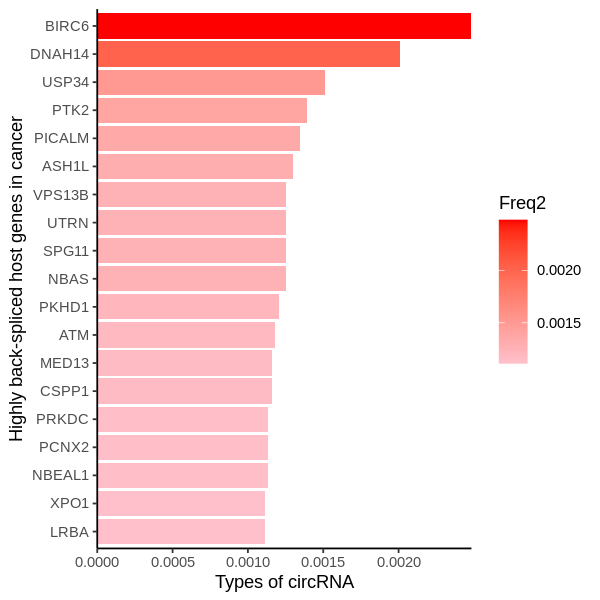

In [70]:
library(ggplot2)
freqcan2<-freqcan[which(freqcan$Freq2>0.001),]
ggplot(freqcan2,aes(x= reorder(Var1,Freq2), y=Freq2,fill=Freq2)) +                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
  geom_bar(stat = "identity") +
  coord_flip()+
  scale_fill_gradient(low = "pink", high = "red")+
  xlab("Highly back-spliced host genes in cancer") +
  scale_y_continuous(name="Types of circRNA",expand=c(0,0))+
  theme_classic()
ggsave("topsplicedcancer.pdf",width=6,height=6)

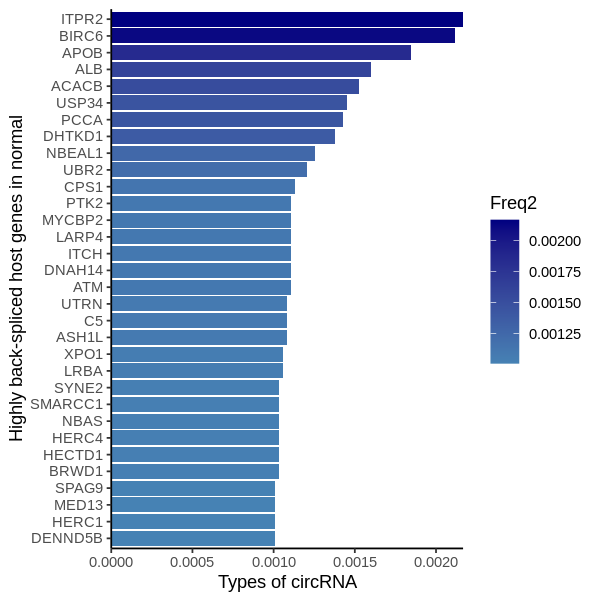

In [71]:
freqnor2<-freqnor[which(freqnor$Freq2>0.001),]
ggplot(freqnor2,aes(x= reorder(Var1,Freq2), y=Freq2,fill=Freq2)) +                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
  geom_bar(stat = "identity") +
  coord_flip()+
  scale_fill_gradient(low = "steelblue", high = "navy")+
  xlab("Highly back-spliced host genes in normal") +
  scale_y_continuous(name="Types of circRNA",expand=c(0,0))+
  theme_classic()
ggsave("topsplicednormal.pdf",width=6,height=6)

In [72]:
table(cleancangene$strand)
table(cleannorgene$strand)


  -_-   -_+   +_-   +_+ 
19817   893   990 20581 


  -_-   -_+   +_-   +_+ 
19201   845   883 19687 

In [73]:
library(VennDiagram)
input<-list(freqcan$Var1,freqnor$Var1)
Table<-calculate.overlap(input)
pdf("0725-venntopbackspliced_all.pdf",width=6,height=6)
venn<-venn.diagram(input,NULL, main.cex = 3,
category = c("Spliced_genes_cancer","Spliced_genes_normal"),fill = c("tomato","steelblue"),
cat.col= c("tomato","steelblue"),   imagetype = "tiff",  main.fontfamily="serif") #, filename = "Vennup.tif"
grid.draw(venn)
dev.off()

png 
  2

In [74]:
write.csv(expr_df,file='circRNAannotation.csv')